# 다항회귀
고차항 (예의 경우 2차)을 만들어줌

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing

In [2]:
poly2 = preprocessing.PolynomialFeatures(degree=2)
poly3 = preprocessing.PolynomialFeatures(degree=3)

In [3]:
X = np.arange(1,5).reshape(2,2)
X

array([[1, 2],
       [3, 4]])

In [4]:
X_poly2 = poly2.fit_transform(X)
    # poly2.fit(X).transform(X) 와 동일
X_poly2 #컬럼별로 2차 다항식(1차, 상수항 포함) 만들어 줌

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  9., 12., 16.]])

In [5]:
X_poly3 = poly3.fit_transform(X)
X_poly3 #컬럼별로 3차 다항식(1차, 2차, 상수항 포함) 만들어 줌

array([[ 1.,  1.,  2.,  1.,  2.,  4.,  1.,  2.,  4.,  8.],
       [ 1.,  3.,  4.,  9., 12., 16., 27., 36., 48., 64.]])

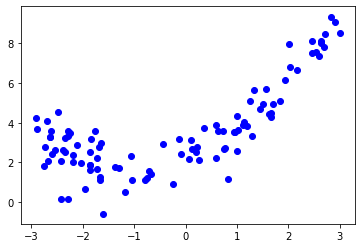

In [6]:
X = 6*np.random.rand(100,1)-3
y = 0.5*X**2+X+2+np.random.randn(100,1)

plt.scatter(X,y,color='blue')
plt.show()

## 데이터 만들기

In [7]:
import sklearn.linear_model as lm

In [10]:
X_test = np.arange(-3,3,0.01)[:,np.newaxis]
X_test.shape

(600, 1)

In [11]:
X1_train = X
y_train = y

In [12]:
# 1차
model = lm.LinearRegression().fit(X1_train,y_train)

In [13]:
X1_test = X_test
y1_pred = model.predict(X1_test)

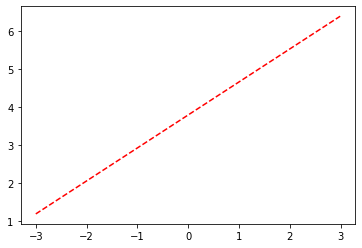

In [15]:
plt.plot(X_test, y1_pred, color='red', linestyle='--')
plt.show()

In [18]:
# 2차
poly = preprocessing.PolynomialFeatures(degree=2)
X2_train = poly.fit_transform(X)
y_train = y

In [19]:
model_2 = lm.LinearRegression().fit(X2_train,y_train)

In [21]:
X2_test = poly.fit_transform(X_test)
y2_pred = model_2.predict(X2_test)

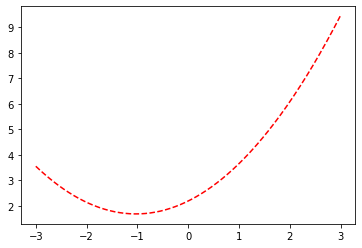

In [23]:
plt.plot(X_test, y2_pred, color='red', linestyle='--')
plt.show()

In [24]:
# 7차
poly = preprocessing.PolynomialFeatures(degree=7)
X7_train = poly.fit_transform(X)
y_train = y

In [25]:
model_7 = lm.LinearRegression().fit(X7_train,y_train)

In [26]:
X7_test = poly.fit_transform(X_test)
y7_pred = model_7.predict(X7_test)

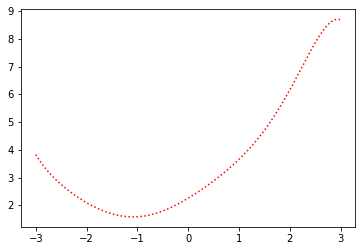

In [28]:
plt.plot(X_test, y7_pred, color='red', linestyle=':')
plt.show()

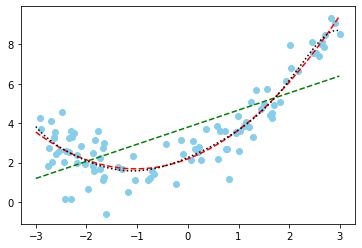

In [32]:
plt.scatter(X,y,color='skyblue')
plt.plot(X_test, y1_pred, color='green', linestyle='--')
plt.plot(X_test, y2_pred, color='red', linestyle='--')
plt.plot(X_test, y7_pred, color='black', linestyle=':')
plt.show()

# 실제 데이터 연습

In [33]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
import pandas as pd
import numpy as np

In [34]:
boston = datasets.load_boston()

In [37]:
b_X = boston.data[:,5][:,np.newaxis]
b_y = boston.target

In [38]:
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(b_X, b_y, test_size=0.3, random_state=1)

In [57]:
xx = np.linspace(b_X.min()-1,b_X.max()+1)[:,np.newaxis]

In [58]:
bst_model = lm.LinearRegression()

In [59]:
# 단순
b_model_1 = bst_model.fit(X_train,y_train)

y_pred1 = b_model_1.predict(X_test)
r2_score1 = metrics.r2_score(y_test,y_pred1)

yy1 = b_model_1.predict(xx)

In [60]:
# 2차
quad = preprocessing.PolynomialFeatures(degree=2)
X_train2 = quad.fit_transform(X_train)
X_test2 = quad.fit_transform(X_test)
xx2 = quad.fit_transform(xx)

b_model_2 = bst_model.fit(X_train2,y_train)

y_pred2 = b_model_2.predict(X_test2)
r2_score2 = metrics.r2_score(y_test,y_pred2)

yy2 = b_model_2.predict(xx2)

In [61]:
# 3차
cubic = preprocessing.PolynomialFeatures(degree=3)
X_train3 = cubic.fit_transform(X_train)
X_test3 = cubic.fit_transform(X_test)
xx3 = cubic.fit_transform(xx)

b_model_3 = bst_model.fit(X_train3,y_train)

y_pred3 = b_model_3.predict(X_test3)
r2_score3 = metrics.r2_score(y_test,y_pred3)

yy3 = b_model_3.predict(xx3)

In [63]:
print(r2_score1,r2_score2,r2_score3)

0.6015774471545623 0.6670629868010144 0.6667764542233267


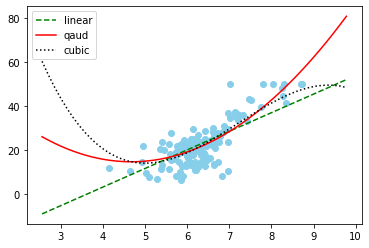

In [66]:
plt.scatter(X_test,y_test,color='skyblue')
plt.plot(xx, yy1, color='green', linestyle='--', label='linear')
plt.plot(xx, yy2, color='red', label='qaud')
plt.plot(xx, yy3, color='black', linestyle=':', label='cubic')
plt.legend()
plt.show()